In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import seaborn as sns
%matplotlib inline

In [ ]:
iris = pd.read_csv("Iris.csv")

## Check the Dataset

In [132]:
iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [133]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [134]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


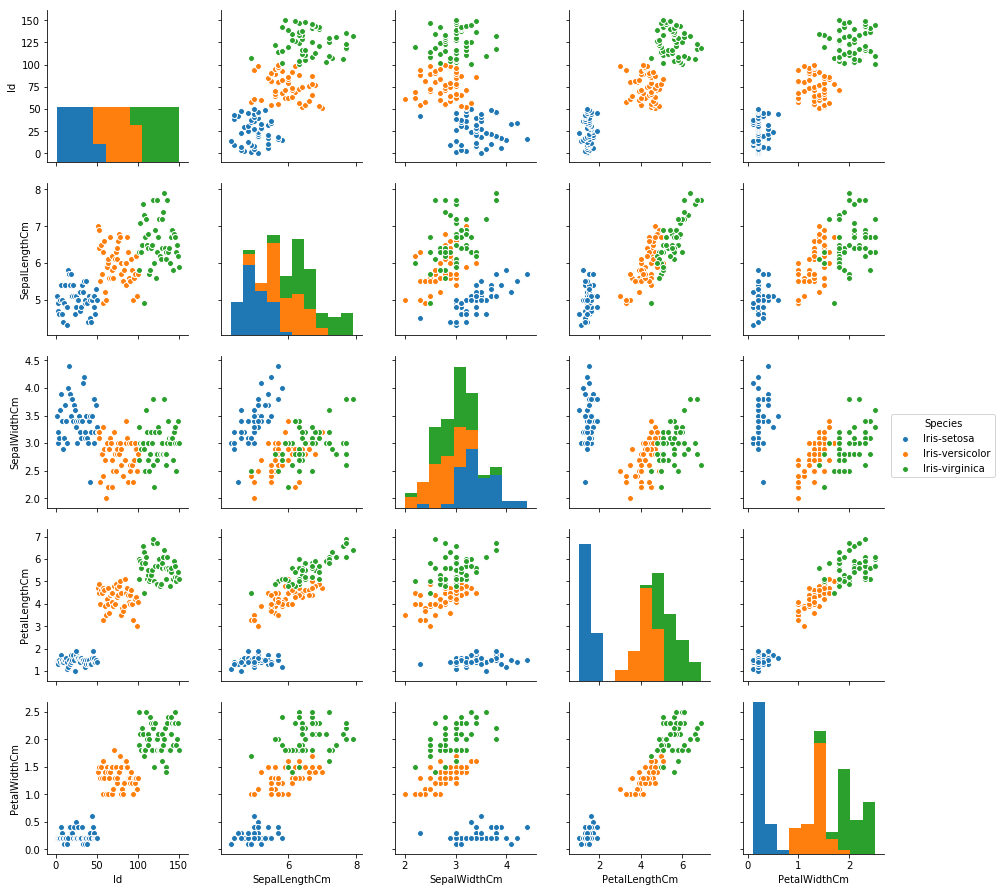

In [135]:
sns.pairplot(data=iris, hue="Species")

## Classification Models

In [136]:
# convert string to int

iris = iris.replace('Iris-setosa',0)
iris = iris.replace('Iris-virginica',2)
iris = iris.replace('Iris-versicolor',1)

In [138]:
# Define x and y

y = iris['Species']
X = iris.drop('Species', axis = 1)
X.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [139]:
# Generate train dataset and test dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(105, 5)
(45, 5)
(105,)
(45,)


#### SVC Model

In [140]:
from sklearn.svm import SVC
c = 1.0  # SVM regularization parameter
svc = SVC(kernel='linear', C=c, decision_function_shape='ovr')
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [141]:
svc.score(X_test, y_test)

1.0

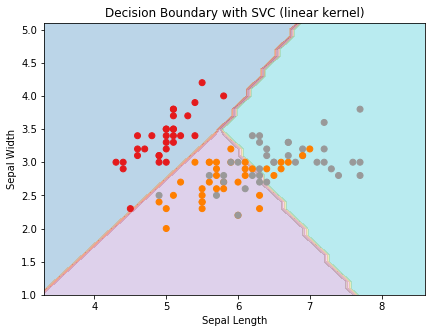

In [162]:
# plot the boundaries with two dimensions

X_train_new = X_train.iloc[:, 1:3]
X_test_new = X_test.iloc[:, 1:3]
svc2 = svc.fit(X_train_new, y_train)

# set the range of x-axis and y-axis for plotting

x_min, x_max = X_train_new.iloc[:, 0].min() - 1, X_train_new.iloc[:, 0].max() + 1  # set the range of x-axis
y_min, y_max = X_train_new.iloc[:, 1].min() - 1, X_train_new.iloc[:, 1].max() + 1  # set the range of y-axis

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))  # create a mesh to plot in; np.arange(start, stop, step)
X_plot = np.c_[xx.ravel(), yy.ravel()]
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)  # reshape the preditced values into the same shape as the mesh

plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X_train_new.iloc[:, 0], X_train_new.iloc[:, 1], c=y_train, cmap=plt.cm.Set1)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.xlim(xx.min(), xx.max())
plt.title('Decision Boundary with SVC (linear kernel)')

plt.show()


#### KNN Model

In [155]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [156]:
knn.score(X_test, y_test)

1.0

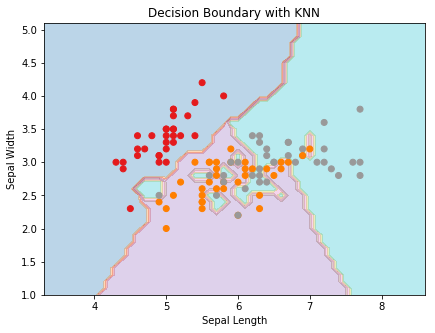

In [170]:
# plot the boundaries with two dimensions

X_train_new = X_train.iloc[:, 1:3]
X_test_new = X_test.iloc[:, 1:3]
knn2 = knn.fit(X_train_new, y_train)

# set the range of x-axis and y-axis for plotting

x_min, x_max = X_train_new.iloc[:, 0].min() - 1, X_train_new.iloc[:, 0].max() + 1  # set the range of x-axis
y_min, y_max = X_train_new.iloc[:, 1].min() - 1, X_train_new.iloc[:, 1].max() + 1  # set the range of y-axis

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))  # create a mesh to plot in; np.arange(start, stop, step)
X_plot = np.c_[xx.ravel(), yy.ravel()]
P = knn2.predict(np.c_[xx.ravel(), yy.ravel()])
P = P.reshape(xx.shape)  # reshape the preditced values into the same shape as the mesh

plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.contourf(xx, yy, P, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X_train_new.iloc[:, 0], X_train_new.iloc[:, 1], c=y_train, cmap=plt.cm.Set1)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.xlim(xx.min(), xx.max())
plt.title('Decision Boundary with KNN')

plt.show()
